In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import seaborn as sns

###  Dataset courtsey 'Great Lakes Management'

### From this dataset, Exploratory Data Analysis(EDA) has been done using various techniques, which are followed by inferences right below the respective codes.

In [3]:
df = pd.read_csv('./StudentsPerformance.csv')

In [4]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [5]:
df.tail()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77
999,female,group D,some college,free/reduced,none,77,86,86


## Section A

In [7]:
#1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
gender                         1000 non-null object
race/ethnicity                 1000 non-null object
parental level of education    1000 non-null object
lunch                          1000 non-null object
test preparation course        1000 non-null object
math score                     1000 non-null int64
reading score                  1000 non-null int64
writing score                  1000 non-null int64
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [133]:
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score', 'total score'],
      dtype='object')

In [134]:
# Dataframe with only categorical variables
df_categorical = df.drop(['math score','reading score','writing score'],axis=1)

# Dataframe with only numerical variables
df_numerical = df.drop(['gender', 'race/ethnicity', 'parental level of education', 'lunch','test preparation course'],axis=1)

In [135]:
df_categorical.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,total score
0,female,group B,bachelor's degree,standard,none,218
1,female,group C,some college,standard,completed,247
2,female,group B,master's degree,standard,none,278
3,male,group A,associate's degree,free/reduced,none,148
4,male,group C,some college,standard,none,229


In [136]:
df_numerical.head()

,math score,reading score,writing score,total score
0,72,72,74,218
1,69,90,88,247
2,90,95,93,278
3,47,57,44,148
4,76,78,75,229


In [14]:
#2)
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [16]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

### Observation:
This dataset does not have any null values. There are zero percent of missing values for all the variables.

In [19]:
#3)
df['test preparation course'].value_counts(normalize=True)

none         0.642
completed    0.358
Name: test preparation course, dtype: float64

In [20]:
df['test preparation course'].value_counts(normalize=True)*100

none         64.2
completed    35.8
Name: test preparation course, dtype: float64

### Observation:
There are 35.8% of students who have completed the course and 64.2% who are yet to complete the course.

In [23]:
#4)
df['parental level of education'].value_counts()

some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: parental level of education, dtype: int64

### Observation:
The level of education held by majority of
parents is that they have atleast gone to some college.

In [26]:
#5)
df['total score'] = df['math score']+df['reading score']+df['writing score']

In [27]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score
0,female,group B,bachelor's degree,standard,none,72,72,74,218
1,female,group C,some college,standard,completed,69,90,88,247
2,female,group B,master's degree,standard,none,90,95,93,278
3,male,group A,associate's degree,free/reduced,none,47,57,44,148
4,male,group C,some college,standard,none,76,78,75,229


## Section B

In [37]:
#6a)
lunch_dummy = pd.get_dummies(df['lunch'])
lunch_dummy.head()

,free/reduced,standard
0,0,1
1,0,1
2,0,1
3,1,0
4,0,1


In [38]:
#6b)
lunch_dummy = lunch_dummy.drop(['free/reduced'],axis=1)
lunch_dummy.head()

,standard
0,1
1,1
2,1
3,0
4,1


In [68]:
#6c)
df_a = pd.concat([df,lunch_dummy],axis=1)

In [71]:
df_a.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score,standard
0,female,group B,bachelor's degree,standard,none,72,72,74,218,1
1,female,group C,some college,standard,completed,69,90,88,247,1
2,female,group B,master's degree,standard,none,90,95,93,278,1
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,0
4,male,group C,some college,standard,none,76,78,75,229,1


In [72]:
df_a.groupby('gender')['standard'].value_counts()

gender  standard
female  1           329
        0           189
male    1           316
        0           166
Name: standard, dtype: int64

In [74]:
df_a.groupby('gender')['standard'].value_counts(normalize=True)*100

gender  standard
female  1           63.513514
        0           36.486486
male    1           65.560166
        0           34.439834
Name: standard, dtype: float64

### Observation:
Standard lunch having by female is 63.5% and male is 65.5%.

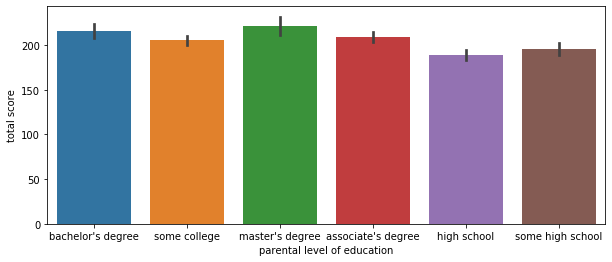

In [81]:
#7a)
plt.figure(figsize=(10,4))
sns.barplot(x='parental level of education',y='total score',data=df)
plt.show()

### Observation:
1)The students of the Parents' having 'Master's Degree' as their level of education has the highest total score.

2)The students of the Parents' having 'High school' as their level of education has the lowest total score.

#7b)
1)The students of the Parents' having 'Master's Degree' as their level of education has the highest total score.

## Section C

In [84]:
#8a)
# Finding and removing outliers if present using IQR method
Q1 = df['math score'].quantile(0.25)
Q3 = df['math score'].quantile(0.75)
IQR = Q3-Q1
IQR

20.0

In [85]:
#Upper Limit
UL = Q3+(1.5*IQR)
UL

107.0

In [86]:
#Lower Limit
LL = Q1-(1.5*IQR)
LL

27.0

In [87]:
#List of Outliers present
df[(df['math score']>UL) | (df['math score']<LL)]df['math score']

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score
17,female,group B,some high school,free/reduced,none,18,32,28,78
59,female,group C,some high school,free/reduced,none,0,17,10,27
145,female,group C,some college,free/reduced,none,22,39,33,94
338,female,group B,some high school,free/reduced,none,24,38,27,89
466,female,group D,associate's degree,free/reduced,none,26,31,38,95
787,female,group B,some college,standard,none,19,38,32,89
842,female,group B,high school,free/reduced,completed,23,44,36,103
980,female,group B,high school,free/reduced,none,8,24,23,55


In [91]:
#Count of outliers
df[(df['math score']>UL) | (df['math score']<LL)].count()['math score']

8

In [95]:
# Clean Dataframe with the above outliers removed
df1 = df[(df['math score']<=UL) & (df['math score']>=LL)]

In [96]:
df1.shape # df1 with 8 outliers removed

(992, 9)

In [97]:
df.shape # original df

(1000, 9)

In [104]:
print('Original skewness',df['math score'].skew())
print('IQR removed skewness',df1['math score'].skew())

Original skewness -0.27893514909431694
IQR removed skewness -0.06930576171107476


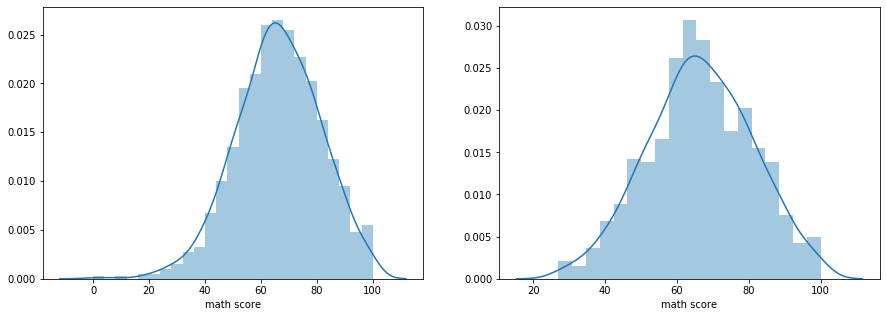

In [105]:
fig,axes = plt.subplots(1,2,figsize=(15,5))
sns.distplot(df['math score'],ax=axes[0])
sns.distplot(df1['math score'],ax=axes[1])
plt.show()

### Observation:
1)The original data is left-skewed with value -0.27893514909431694

2)After the removal of outliers,the skewness had reduced, with the value -0.06930576171107476 moving towards 0

In [102]:
#8b)
df.corr()

,math score,reading score,writing score,total score
math score,1.000000,0.817580,0.802642,0.918746
reading score,0.817580,1.000000,0.954598,0.970331
writing score,0.802642,0.954598,1.000000,0.965667
total score,0.918746,0.970331,0.965667,1.000000


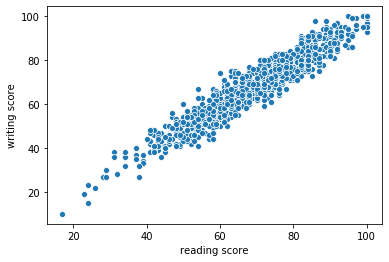

In [103]:
sns.scatterplot(x='reading score',y='writing score',data=df)
plt.show()

### Observation:
1)The correlation between reading score and writing score is 0.954598.

2)It is a positively correlated.

3)They are directly proportional to each other.

4)As the value of one variable increases, the other variable value also will increases.

In [119]:
#8c)
# Dataframe with only categorical variables
df_cat = df.drop(['math score','reading score','writing score','total score'],axis=1)

In [120]:
df_cat.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course
0,female,group B,bachelor's degree,standard,none
1,female,group C,some college,standard,completed
2,female,group B,master's degree,standard,none
3,male,group A,associate's degree,free/reduced,none
4,male,group C,some college,standard,none


In [114]:
# Applying LabelEncoder to all the categorical variables
from sklearn.preprocessing import LabelEncoder

In [115]:
le = LabelEncoder()

In [121]:
df_cat['Lab_gender'] = le.fit_transform(df_cat['gender'] )

In [122]:
df_cat['lab_race/eth'] = le.fit_transform(df_cat['race/ethnicity'] )

In [123]:
df_cat['lab_parental loe'] = le.fit_transform(df_cat['parental level of education'] )

In [124]:
df_cat['lab_lunch'] = le.fit_transform(df_cat['lunch'] )

In [125]:
df_cat['lab_test prep cr'] = le.fit_transform(df_cat['test preparation course'] )

In [126]:
df_cat.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,Lab_gender,lab_race/eth,lab_parental loe,lab_lunch,lab_test prep cr
0,female,group B,bachelor's degree,standard,none,0,1,1,1,1
1,female,group C,some college,standard,completed,0,2,4,1,0
2,female,group B,master's degree,standard,none,0,1,3,1,1
3,male,group A,associate's degree,free/reduced,none,1,0,0,0,1
4,male,group C,some college,standard,none,1,2,4,1,1


#### Observation:
The encoding technique that I recommend to the categorical variables is Label Encoder.

In [127]:
#8d) Splitting the dataset based on the dependent and independent features
from sklearn.model_selection import train_test_split

In [130]:
X = df.drop('total score',axis=1) # Features
y = df['total score']  # Target variable

In [131]:
#8e) 
X_train, X_test, Y_train, Y_test = train_test_split(X,y,train_size=0.7,random_state=0) 
#Split the dataset into train and test in 70-30 percent format.